# UAS Big Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Chapter 1: Time Series Analysis


In [106]:
national_income = pd.read_excel('./data/SEKI_JANUARI_2024/TABEL4_1.xls', engine='xlrd', header=4, sheet_name='4.1')
national_income.head()

,Unnamed: 0,Unnamed: 1,KETERANGAN,2008,2009,2010,2011,2012,Unnamed: 8,2013,...,2018,2019,2020,2021,2022,2019.1,2020.1,Unnamed: 22,ITEMS,Unnamed: 24
0,1,NaN,APBN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Budget,1.0
1,2,NaN,Pendapatan Negara dan Hibah,894990.6,870999.01,992398.8,1169914.4,1358205.0,NaN,1502005.02,...,1894720.33,2165111.82,1699948.46,1.743649e+06,2.266199e+06,NaN,NaN,NaN,Government Revenues and Grants,2.0
2,3,NaN,Penerimaan Dalam Negeri,892042.0,869992.51,990502.3,1165252.3,1357379.9,NaN,1497521.39,...,1893523.46,2164676.51,1698648.46,1.742746e+06,2.265619e+06,NaN,NaN,NaN,Domestic Revenues,3.0
3,4,NaN,Penerimaan Perpajakan,609227.5,651954.90,743325.8,878685.2,1016237.3,NaN,1148364.68,...,1618095.49,1786378.65,1404507.51,1.444542e+06,1.783988e+06,NaN,NaN,NaN,Tax Revenues,4.0
4,5,NaN,Pajak Dalam Negeri,580248.3,631931.80,720764.4,831745.3,968293.2,NaN,1099943.59,...,1579395.49,1743056.85,1371020.56,1.409581e+06,1.704958e+06,NaN,NaN,NaN,Domestic Taxes,5.0


In [107]:
national_income = national_income.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 8', 'Unnamed: 11', 'Unnamed: 22', '2019.1', '2020.1', 'ITEMS', 'Unnamed: 24'])
national_income = national_income.drop(index=[0] + list(range(27, 55)))
national_income = national_income.set_index('KETERANGAN').T
national_income

KETERANGAN,Pendapatan Negara dan Hibah,Penerimaan Dalam Negeri,Penerimaan Perpajakan,Pajak Dalam Negeri,Pajak Penghasilan (PPh),Non Migas,Migas,Pajak Pertambahan Nilai (PPN),Pajak Bumi dan Bangunan (PBB),Bea Perolehan Hak Atas Tanah dan Bangunan (BPHTB)1,...,Penerimaan Sumber Daya Alam,Minyak Bumi dan Gas Alam,Minyak Bumi,Gas Alam,Non Minyak Bumi dan Gas Alam,Bagian Laba BUMN,Surplus Bank Indonesia,Pendapatan Badan Layanan Umum,PNBP lainnya,Hibah
2008,894990.6,892042.0,609227.5,580248.3,305015.9,251366.0,53649.9,195464.0,25266.0,5431.2,...,192789.5,0.0,149111.3,33835.6,9842.6,31244.3,0.0,0.0,58780.7,2948.6
2009,870999.01,869992.51,651954.9,631931.8,340209.2,291175.8,49033.4,203084.0,23863.6,6980.0,...,138653.31,0.0,91491.04,36257.12,10905.15,28614.7,0.0,5890.9,44878.7,1006.5
2010,992398.8,990502.3,743325.8,720764.4,362219.0,306836.6,55382.4,262963.0,25319.1,7155.5,...,164726.8,0.0,112515.1,39204.8,13006.9,29500.0,0.0,9486.9,43462.8,1896.5
2011,1169914.4,1165252.3,878685.2,831745.3,431977.0,366746.3,65230.7,298441.4,29057.8,0.0,...,191976.0,0.0,123051.0,50116.2,18808.8,28835.8,0.0,15416.0,50339.4,4662.1
2012,1358205.0,1357379.9,1016237.3,968293.2,513650.1,445733.4,67916.7,336057.0,29687.5,0.0,...,217158.9,0.0,150847.2,47463.9,18847.8,30776.3,0.0,20408.0,72799.4,825.1
2013,1502005.02,1497521.39,1148364.68,1099943.59,538759.86,464481.88,74277.98,423708.25,27343.8,0.0,...,203730.03,0.0,129339.22,51271.18,23119.63,36456.49,0.0,23498.73,85471.47,4483.63
2014,1635378.52,1633053.4,1246106.97,1189826.59,569866.69,83889.79,485976.9,475587.18,21742.9,0.0,...,241114.62,0.0,154750.36,56917.84,29446.42,40000.0,0.0,20863.38,84968.41,2325.11
2015,1761642.82,1758330.91,1489255.49,1439998.6,679370.14,629835.35,49534.79,576469.17,26689.88,0.0,...,118919.13,0.0,61584.01,19780.87,37554.25,36956.5,0.0,23090.21,90109.58,3311.9
2016,1786225.03,1784249.85,1539166.24,1503294.74,855842.7,819496.77,36345.93,474235.34,17710.6,0.0,...,90524.42,0.0,51328.08,17360.04,21836.3,34164.0,0.0,36271.23,84123.96,1975.17
2017,1736060.15,1732952.01,1472709.86,1436730.86,783970.27,742200.0,41770.27,475483.49,15412.1,0.0,...,95643.15,0.0,57406.8,14801.09,23435.26,41000.0,0.0,38541.44,85057.56,3108.14


In [108]:
national_income.index = national_income.index.astype(str)

In [109]:
national_income.index

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [110]:
national_income.index = pd.to_datetime(national_income.index + '-01-01')
national_income

KETERANGAN,Pendapatan Negara dan Hibah,Penerimaan Dalam Negeri,Penerimaan Perpajakan,Pajak Dalam Negeri,Pajak Penghasilan (PPh),Non Migas,Migas,Pajak Pertambahan Nilai (PPN),Pajak Bumi dan Bangunan (PBB),Bea Perolehan Hak Atas Tanah dan Bangunan (BPHTB)1,...,Penerimaan Sumber Daya Alam,Minyak Bumi dan Gas Alam,Minyak Bumi,Gas Alam,Non Minyak Bumi dan Gas Alam,Bagian Laba BUMN,Surplus Bank Indonesia,Pendapatan Badan Layanan Umum,PNBP lainnya,Hibah
2008-01-01,894990.6,892042.0,609227.5,580248.3,305015.9,251366.0,53649.9,195464.0,25266.0,5431.2,...,192789.5,0.0,149111.3,33835.6,9842.6,31244.3,0.0,0.0,58780.7,2948.6
2009-01-01,870999.01,869992.51,651954.9,631931.8,340209.2,291175.8,49033.4,203084.0,23863.6,6980.0,...,138653.31,0.0,91491.04,36257.12,10905.15,28614.7,0.0,5890.9,44878.7,1006.5
2010-01-01,992398.8,990502.3,743325.8,720764.4,362219.0,306836.6,55382.4,262963.0,25319.1,7155.5,...,164726.8,0.0,112515.1,39204.8,13006.9,29500.0,0.0,9486.9,43462.8,1896.5
2011-01-01,1169914.4,1165252.3,878685.2,831745.3,431977.0,366746.3,65230.7,298441.4,29057.8,0.0,...,191976.0,0.0,123051.0,50116.2,18808.8,28835.8,0.0,15416.0,50339.4,4662.1
2012-01-01,1358205.0,1357379.9,1016237.3,968293.2,513650.1,445733.4,67916.7,336057.0,29687.5,0.0,...,217158.9,0.0,150847.2,47463.9,18847.8,30776.3,0.0,20408.0,72799.4,825.1
2013-01-01,1502005.02,1497521.39,1148364.68,1099943.59,538759.86,464481.88,74277.98,423708.25,27343.8,0.0,...,203730.03,0.0,129339.22,51271.18,23119.63,36456.49,0.0,23498.73,85471.47,4483.63
2014-01-01,1635378.52,1633053.4,1246106.97,1189826.59,569866.69,83889.79,485976.9,475587.18,21742.9,0.0,...,241114.62,0.0,154750.36,56917.84,29446.42,40000.0,0.0,20863.38,84968.41,2325.11
2015-01-01,1761642.82,1758330.91,1489255.49,1439998.6,679370.14,629835.35,49534.79,576469.17,26689.88,0.0,...,118919.13,0.0,61584.01,19780.87,37554.25,36956.5,0.0,23090.21,90109.58,3311.9
2016-01-01,1786225.03,1784249.85,1539166.24,1503294.74,855842.7,819496.77,36345.93,474235.34,17710.6,0.0,...,90524.42,0.0,51328.08,17360.04,21836.3,34164.0,0.0,36271.23,84123.96,1975.17
2017-01-01,1736060.15,1732952.01,1472709.86,1436730.86,783970.27,742200.0,41770.27,475483.49,15412.1,0.0,...,95643.15,0.0,57406.8,14801.09,23435.26,41000.0,0.0,38541.44,85057.56,3108.14


In [118]:
national_income = national_income.apply(pd.to_numeric, errors='coerce')

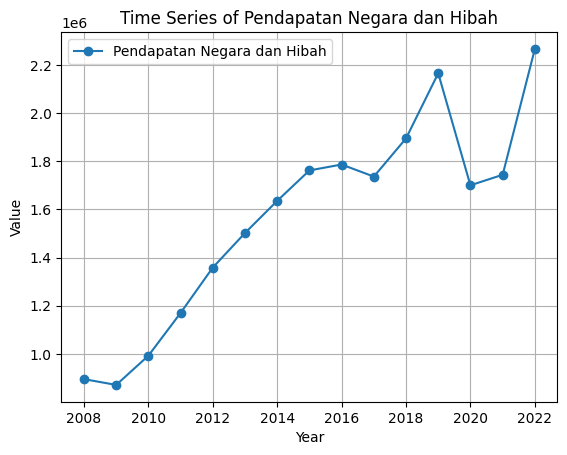

In [119]:
import matplotlib.pyplot as plt

plt.plot(national_income.index, national_income['Pendapatan Negara dan Hibah'], marker='o', label='Pendapatan Negara dan Hibah')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series of Pendapatan Negara dan Hibah')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
from statsmodels.tsa.arima.model import ARIMA


In [121]:
train_national_income = national_income['Pendapatan Negara dan Hibah'][:'2019']
test_national_income = national_income['Pendapatan Negara dan Hibah']['2020':]


In [123]:
model = ARIMA(train_national_income, order=(1, 1, 1))
model_fit = model.fit()

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model_fit.forecast(steps=len(test_national_income))

result = pd.DataFrame({'Actual': test_national_income, 'Forecast': forecast})
print(result)

                  Actual      Forecast
2020-01-01  1.699948e+06  2.278748e+06
2021-01-01  1.743649e+06  2.392380e+06
2022-01-01  2.266199e+06  2.506008e+06


In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_national_income, forecast)
mae = mean_absolute_error(test_national_income, forecast)
mape = (abs((test_national_income - forecast) / test_national_income).mean()) * 100

print(f'MSE: {mse}, MAE: {mae}, MAPE: {mape}%')


MSE: 271123044232.81827, MAE: 489113.1540396143, MAPE: 27.27847602543279%


In [138]:
future_forecast = model_fit.forecast(steps=10)
print(f'Future Forecast (2023-2027): {future_forecast}')

Future Forecast (2023-2027): 2020-01-01    2.278748e+06
2021-01-01    2.392380e+06
2022-01-01    2.506008e+06
2023-01-01    2.619632e+06
2024-01-01    2.733253e+06
2025-01-01    2.846869e+06
2026-01-01    2.960482e+06
2027-01-01    3.074090e+06
2028-01-01    3.187695e+06
2029-01-01    3.301296e+06
Freq: YS-JAN, Name: predicted_mean, dtype: float64


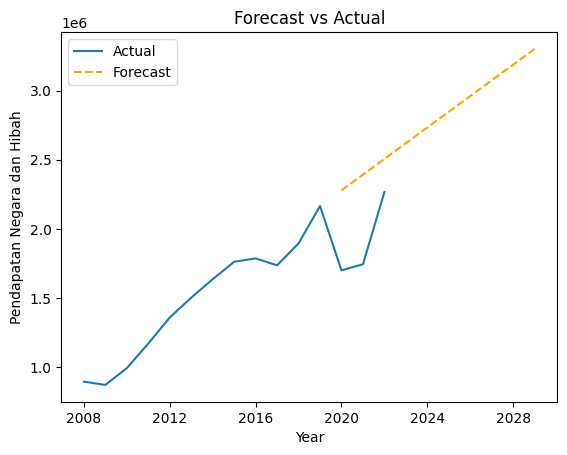

In [139]:
plt.plot(national_income.index, national_income['Pendapatan Negara dan Hibah'], label='Actual')
# plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')
plt.plot(future_forecast.index, future_forecast, label='Forecast', linestyle='--', color='orange')
plt.xlabel('Year')
plt.ylabel('Pendapatan Negara dan Hibah')
plt.title('Forecast vs Actual')
plt.legend()
plt.show()

## Chapter 2: NN Classification


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
pegawai_train = pd.read_excel('./data/Pegawai.xlsx', engine='openpyxl', header=5)
pegawai_train

,Name,Sex,Marital Status,Children,Education,Years Employed,Work Hours,Career Development,Salary,Bonuses,Unnamed: 10,Employee Intention
0,Samuel Brewster,M,M,2,Graduate Degree,4,57,2,2523,101,NaN,Leave
1,Ernest Brewster,M,M,2,Graduate Degree,14,48,3,5071,127,NaN,Stay
2,Samuel Smith,M,M,2,Graduate Degree,2,42,1,4563,22,NaN,Leave
3,Alex Steinman,M,S,1,Graduate Degree,11,31,2,8835,265,NaN,Stay
4,John Coriano,M,M,1,Graduate Degree,3,47,2,4937,133,NaN,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Joan Smith,F,M,1,High School,4,60,0,3256,30,NaN,Leave
196,Faith Coleman,F,M,1,College,8,46,2,3350,101,NaN,Stay
197,John Silverman,M,M,1,High School,2,52,1,3633,127,NaN,Stay
198,Gary Baker,M,M,2,College,5,48,5,3157,95,NaN,Stay


In [12]:
pegawai_train = pegawai_train.drop(columns=['Unnamed: 10', 'Name'])
pegawai_train

,Sex,Marital Status,Children,Education,Years Employed,Work Hours,Career Development,Salary,Bonuses,Employee Intention
0,M,M,2,Graduate Degree,4,57,2,2523,101,Leave
1,M,M,2,Graduate Degree,14,48,3,5071,127,Stay
2,M,M,2,Graduate Degree,2,42,1,4563,22,Leave
3,M,S,1,Graduate Degree,11,31,2,8835,265,Stay
4,M,M,1,Graduate Degree,3,47,2,4937,133,Stay
...,...,...,...,...,...,...,...,...,...,...
195,F,M,1,High School,4,60,0,3256,30,Leave
196,F,M,1,College,8,46,2,3350,101,Stay
197,M,M,1,High School,2,52,1,3633,127,Stay
198,M,M,2,College,5,48,5,3157,95,Stay


In [13]:
label_encoders = {}
for column in ['Sex', 'Marital Status', 'Education', 'Employee Intention']:
    le = LabelEncoder()
    pegawai_train[column] = le.fit_transform(pegawai_train[column])
    label_encoders[column] = le

In [16]:
X = pegawai_train.drop(columns=["Employee Intention"])
y = pegawai_train["Employee Intention"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7406 - loss: 0.5860 - val_accuracy: 0.7188 - val_loss: 0.5851
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8406 - loss: 0.5220 - val_accuracy: 0.7188 - val_loss: 0.5505
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8417 - loss: 0.4785 - val_accuracy: 0.7188 - val_loss: 0.5214
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8151 - loss: 0.4681 - val_accuracy: 0.7188 - val_loss: 0.4949
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8073 - loss: 0.4266 - val_accuracy: 0.7188 - val_loss: 0.4690
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8250 - loss: 0.3936 - val_accuracy: 0.6875 - val_loss: 0.4465
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8292 - loss: 0.3697 - val_accuracy: 0.6875 - val_loss: 0.4251
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8365 - loss: 0.3454 - val_accuracy: 0.7500 - val_loss: 0.4040


In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9729 - loss: 0.0923
Test Accuracy: 0.98


In [22]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

decoded_predictions = label_encoders['Employee Intention'].inverse_transform(predicted_classes.ravel())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [32]:
forecast_data = pd.read_excel('./data/Pegawai.xlsx', engine='openpyxl', header=5, sheet_name='Forcasting')
forecast_data

,Unnamed: 0,Name,Sex,Marital Status,Children,Education,Years Employed,Work Hours,Career Development,Salary,Bonuses,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Carol Farmer,F,M,1,College,5,57,2,2091,28,NaN,NaN,NaN,Leave
1,NaN,Robert Gorman,M,M,2,College,3,32,2,4069,122,NaN,NaN,NaN,Stay


In [33]:
forecast_data = forecast_data.drop(columns=['Unnamed: 0', 'Name', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
forecast_data = forecast_data.rename(columns={'Unnamed: 14': 'Employee Intention'})
forecast_data

,Sex,Marital Status,Children,Education,Years Employed,Work Hours,Career Development,Salary,Bonuses,Employee Intention
0,F,M,1,College,5,57,2,2091,28,Leave
1,M,M,2,College,3,32,2,4069,122,Stay


In [34]:
actual = forecast_data['Employee Intention']
x_forecast = forecast_data.drop(columns=['Employee Intention'])

In [35]:
for column in ['Sex', 'Marital Status', 'Education']:
    x_forecast[column] = label_encoders[column].transform(x_forecast[column])

In [36]:
x_forecast_scale = scaler.transform(x_forecast)

In [37]:
new_predictions = model.predict(x_forecast_scale)
new_predicted_class = (new_predictions > 0.5).astype(int)

new_decoded_prediction = label_encoders['Employee Intention'].inverse_transform(new_predicted_class.ravel())

print(f"Predicted Employee Intention: {new_decoded_prediction[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Predicted Employee Intention: Leave


In [39]:
actual_labels_encoded = label_encoders['Employee Intention'].transform(actual)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(actual_labels_encoded, new_predicted_class)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(actual_labels_encoded, new_predicted_class, target_names=label_encoders['Employee Intention'].classes_))

conf_matrix = confusion_matrix(actual_labels_encoded, new_predicted_class)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

       Leave       1.00      1.00      1.00         1
        Stay       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
[[1 0]
 [0 1]]


## Chapter 3: DT Classification


In [42]:
medical_data = pd.read_excel('./data/Diabetes_Classification.xlsx', engine='openpyxl')
medical_data

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No diabetes,NaN,NaN
386,387,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes,NaN,NaN
387,388,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No diabetes,NaN,NaN
388,389,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes,NaN,NaN


In [43]:
medical_data = medical_data.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Patient number'])
medical_data

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No diabetes
386,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes
387,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No diabetes
388,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes


In [46]:
medical_label_encoders = {}
for column in ['Gender', 'Diabetes']:
    le = LabelEncoder()
    medical_data[column] = le.fit_transform(medical_data[column])
    medical_label_encoders[column] = le

In [47]:
y_medicine = medical_data['Diabetes']
X_medicine = medical_data.drop(columns=['Diabetes'])

In [48]:
X_medicine_train, X_medicine_test, y_medicine_train, y_medicine_test = train_test_split(X_medicine, y_medicine, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_medicine_train = scaler.fit_transform(X_medicine_train)
X_medicine_test = scaler.transform(X_medicine_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_classifier.fit(X_medicine_train, y_medicine_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [53]:
y_medicine_pred = dt_classifier.predict(X_medicine_test)

accuracy = accuracy_score(y_medicine_test, y_medicine_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_medicine_test, y_medicine_pred, target_names=medical_label_encoders['Diabetes'].classes_))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_medicine_test, y_medicine_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

    Diabetes       0.59      0.62      0.61        16
 No diabetes       0.90      0.89      0.89        62

    accuracy                           0.83        78
   macro avg       0.74      0.76      0.75        78
weighted avg       0.84      0.83      0.84        78


Confusion Matrix:
[[10  6]
 [ 7 55]]


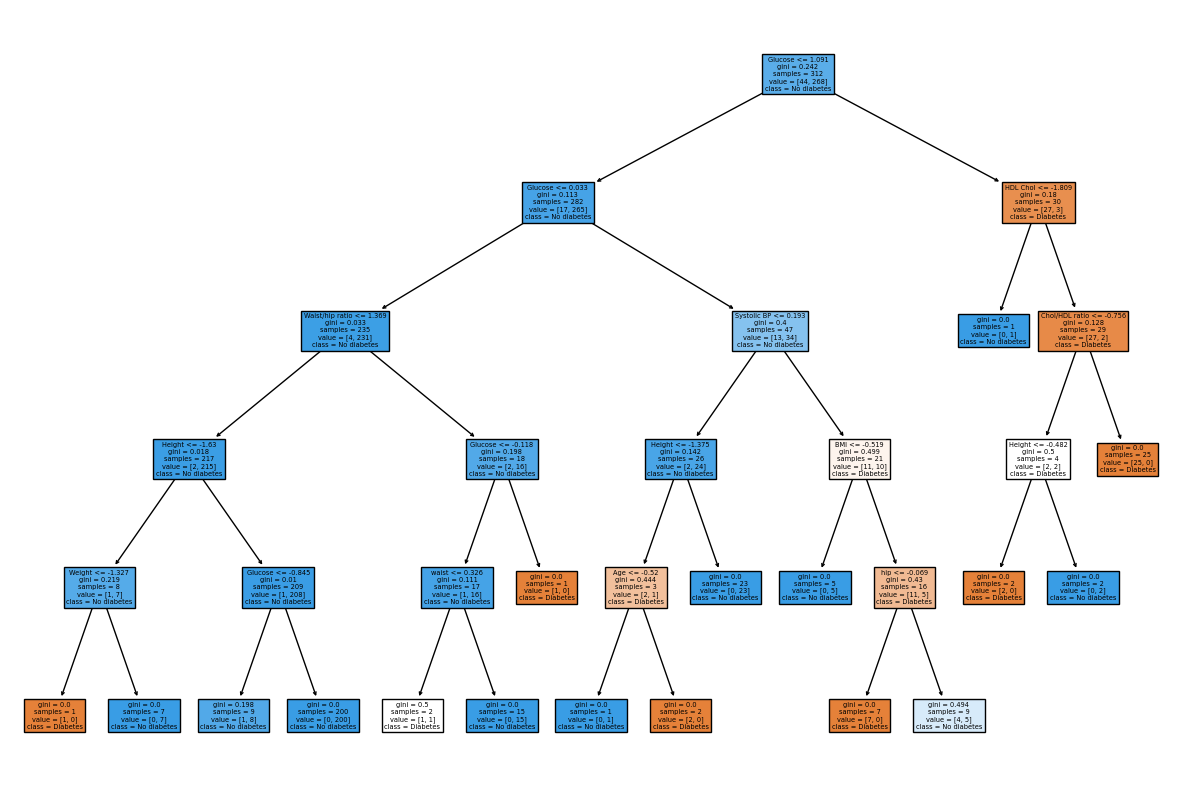

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X_medicine.columns, class_names=medical_label_encoders['Diabetes'].classes_, filled=True)
plt.show()


## Chasper 4: Clustering


In [140]:
rent = pd.read_csv('./data/LondonBikeJourneyAug2023.csv')
rent

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,8/31/2023 23:59,988,"Great Russell Street, Bloomsbury",9/1/2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,8/31/2023 23:59,2660,"Frith Street, Soho",9/1/2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,8/31/2023 23:59,200190,"Queen's Circus, Battersea Park",9/1/2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,8/31/2023 23:59,959,"Milroy Walk, South Bank",9/1/2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [141]:
rent['Start date'] = pd.to_datetime(rent['Start date'])
rent['End date'] = pd.to_datetime(rent['End date'])

In [142]:
rent['Total duration (m)'] = rent['Total duration (ms)'].apply(lambda x: round(x/1000/60))

In [143]:
rent

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Total duration (m)
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,17
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,17
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",2023-08-01 00:11:00,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,11
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",2023-08-01 00:12:00,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,12
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",2023-08-01 00:17:00,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16
...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",2023-09-01 00:21:00,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,22
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",2023-09-01 00:10:00,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,11
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",2023-09-01 00:13:00,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,14
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",2023-09-01 00:06:00,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,7


In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [146]:
rent['Start hour'] = rent['Start date'].dt.hour
features = rent[['Total duration (m)', 'Start hour']]

In [147]:
features

,Total duration (m),Start hour
0,17,0
1,17,0
2,11,0
3,12,0
4,16,0
...,...,...
776522,22,23
776523,11,23
776524,14,23
776525,7,23


In [148]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [149]:
kmeans = KMeans(n_clusters=3, random_state=42)
rent['Cluster'] = kmeans.fit_predict(scaled_features)

print(rent[['Total duration (m)', 'Start hour', 'Cluster']].head())

   Total duration (m)  Start hour  Cluster
0                  17           0        1
1                  17           0        1
2                  11           0        1
3                  12           0        1
4                  16           0        1


In [150]:
rent['Cluster'].value_counts()

Cluster
0    482703
1    293822
2         2
Name: count, dtype: int64

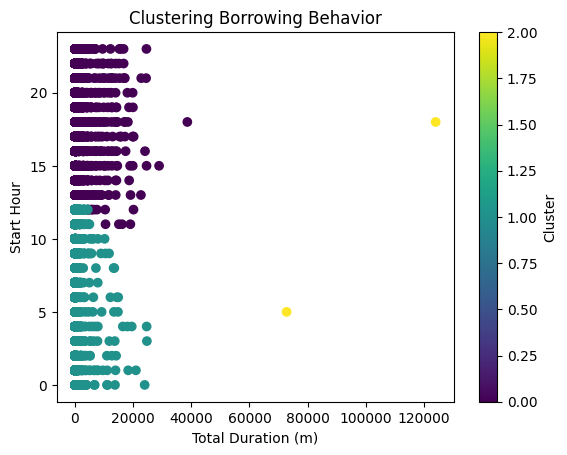

In [151]:
import matplotlib.pyplot as plt

plt.scatter(rent['Total duration (m)'], rent['Start hour'], c=rent['Cluster'], cmap='viridis')
plt.xlabel('Total Duration (m)')
plt.ylabel('Start Hour')
plt.title('Clustering Borrowing Behavior')
plt.colorbar(label='Cluster')
plt.show()

## Chapter 5: Association Rule Mining


In [2]:
online_shop = pd.read_csv('./data/Bakery.csv')
online_shop

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [4]:
online_shop = online_shop.drop(columns=['DateTime', 'Daypart', 'DayType'])

In [20]:
transaction_data = online_shop.pivot_table(index='TransactionNo', columns='Items', aggfunc=lambda x: 1, fill_value=0)

In [21]:
transaction_data

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
min_support = 0.001
frequent_itemsets = apriori(transaction_data, min_support=min_support, use_colnames=True)

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
print(frequent_itemsets)

      support                                itemsets
0    0.004543              (Afternoon with the baker)
1    0.036344                             (Alfajores)
2    0.004015                              (Art Tray)
3    0.016059                              (Baguette)
4    0.005071                              (Bakewell)
..        ...                                     ...
466  0.001585                   (Tea, Soup, Sandwich)
467  0.001373              (Tea, Coffee, Cake, Bread)
468  0.001057  (Bread, Pastry, Coffee, Hot chocolate)
469  0.001162      (Coffee, Pastry, Medialuna, Bread)
470  0.001057           (Tea, Coffee, Cake, Sandwich)

[471 rows x 2 columns]


In [31]:
min_confidence = 0.7

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=9684)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,1.0,0.001355,2.831575,0.415249,0.006836,0.646840,0.411318
1,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,1.0,0.002204,2.738431,0.411783,0.011233,0.634827,0.410394
2,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
3,"(Salad, Cake)",(Coffee),0.001373,0.478394,0.001057,0.769231,1.607944,1.0,0.000399,2.260292,0.378608,0.002207,0.557579,0.385720
4,"(Toast, Cake)",(Coffee),0.002219,0.478394,0.001585,0.714286,1.493091,1.0,0.000523,1.825621,0.330983,0.003308,0.452241,0.358799
5,"(Vegan mincepie, Cake)",(Coffee),0.001268,0.478394,0.001057,0.833333,1.741939,1.0,0.000450,3.129635,0.426468,0.002208,0.680474,0.417771
6,"(Scone, Cookies)",(Coffee),0.002007,0.478394,0.001585,0.789474,1.650258,1.0,0.000624,2.477628,0.394827,0.003310,0.596388,0.396393
7,"(Salad, Extra Salami or Feta)",(Coffee),0.001690,0.478394,0.001479,0.875000,1.829036,1.0,0.000670,4.172847,0.454031,0.003091,0.760355,0.439046
8,"(Hearty & Seasonal, Sandwich)",(Coffee),0.001479,0.478394,0.001268,0.857143,1.791709,1.0,0.000560,3.651241,0.442528,0.002649,0.726121,0.429897
9,"(Pastry, Juice)",(Coffee),0.002324,0.478394,0.001796,0.772727,1.615253,1.0,0.000684,2.295066,0.381789,0.003750,0.564283,0.388241


## Chapter 6: Harvest


In [89]:
harvest = pd.read_csv('./data/soybean.csv')
harvest

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [90]:
season_1 = harvest[harvest['Season'] == 1]['GY']
season_2 = harvest[harvest['Season'] == 2]['GY']

In [92]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(season_1, season_2)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Ada perbedaan yang signifikan antara hasil panen Season 1 dan Season 2.")
else:
    print("Tidak ada perbedaan yang signifikan antara hasil panen Season 1 dan Season 2.")


T-Statistic: 0.35154600089854243
P-Value: 0.7254115857412808
Tidak ada perbedaan yang signifikan antara hasil panen Season 1 dan Season 2.
